# Variational Quantum Eigen Solver (VQE) Tutorial

This tutorial is intended for new students working on quantum computing projects with Dr. Michael McGuigan. It gives a brief overview of the theory behind the variational method and gives an in-depth guide to running your first VQE program using IBM's QISKit python library. We will do two examples: The 1-D Harmonic Oscillator as well as the 1-D Anharmonic Oscillator

# The Variational Method

## Claim:
The Variational method guarentees to set an upper bound for the ground state energy ($E_{gs}$) of a system described by the Hamiltonian H


\begin{equation}E_{gs} \leqslant \langle\psi|H|\psi\rangle \equiv \langle H\rangle\end{equation}

The variational method is so powerful because it can give a somewhat accurate idea of the ground state energy of a system by simply guessing a trial wave fucntion and finding $\langle H\rangle$. 

## 1-D Harmonic Oscillator Example 
##### From example 7.1 on pgs. 294-295 of D.J. Griffiths' Introduction to Quantum Mechanics
Suppose we start with the following potential $V(x)$:
\begin{equation}
V(x) = \frac{1}{2}m\omega^{2}x^{2}
\end{equation}

With this, the Hamiltonian is written:

\begin{equation}
H = -\frac{\hbar^{2}}{2m}\frac{d^{2}}{dx^{2}} + \frac{1}{2}m\omega^{2}x^{2}
\end{equation}

To find an upper bound for $E_{gs}$ we start by choosing a trial wave function. We'll try:

\begin{equation}\psi(x) = Ae^{-bx^{2}}\end{equation}
where b is a constant and A is the normalization constant.

Now we find the expectation value of the Hamiltonian

\begin{equation}\langle{H}\rangle{} = \langle{T}\rangle + \langle{V}\rangle\end{equation}

where the expectation of the kinetic energy is

\begin{equation}\langle{T}\rangle = -\frac{\hbar^{2}}{2m}|A^{2}| \int_{-\infty}^{\infty} e^{-bx^{2}} \frac{d^{2}}{dx^{2}} e^{-bx^{2}}dx = \frac{\hbar^{2}b}{2m}\end{equation}

and the expectation of the potential energy is

\begin{equation}\langle{V}\rangle = \frac{1}{2}m\omega^{2}x^{2}|A^{2}| \int_{-\infty}^{\infty} e^{-2bx^{2}}dx = \frac{m\omega^{2}}{8b}\end{equation}

Therefore:

\begin{equation}\langle H\rangle = \frac{\hbar^{2}b}{2m} + \frac{m\omega^{2}}{8b}\end{equation}

The above relation exceeds $E_{gs}$ for any b, therefore, to get the greatest lower bound we need to minimize $\langle H\rangle$

\begin{equation}\frac{d}{db}\langle H\rangle = \frac{\hbar^{2}}{2m} - \frac{m\omega^{2}}{8b^{2}} = 0 \implies b = \frac{m\omega}{2\hbar}\end{equation}

After pluggin this back into $\langle H\rangle$ we get the familiar result:

\begin{equation}\langle H\rangle_{min} = \frac{1}{2}\hbar\omega\end{equation}

# 1-D Anharmonic Oscillator
### Example taken from pg. 440 from red text book

The Anharmonic Oscillator has a potential of the form
$$V(x) = \lambda x^{4} $$
where $\lambda$ is a constant.

The first step in the variational method is to choose a trial wave function that we hope best represents the actual wave function. Unfortunately this boils down to a complete guess, but we can still get very acurate results with some reasoning. We expect the following with regards to the ground state:
1. It will have parity
2. It will have no nodes
3. It will have even parity
4. It will peak at $x = 0$ so as to minimize $V(x)$
5. It will vanish as $|x| \rightarrow \infty$

A trial wave fucntion that has all of these properties with the added nicety of being easy to integrate and differentiate is a Gaussian of the form:

$$\psi(x, \alpha) = e^{-\alpha x^{2}/2}$$
where $\alpha$ is a free parameter

Therefore, the energy function $E(\alpha)$ as a function of $\alpha$ is:

$$E(\alpha) = \frac{\int e^{-\alpha x^{2}/2} (-\frac{\hbar^{2}}{2m}\frac{d^{2}}{dx^{2}} + \lambda x^{4}) e^{-\alpha x^{2}/2}dx}{\int e^{-\alpha x^{2}/2} dx} = \frac{\hbar^{2}\alpha}{4m} + \frac{3\lambda}{4\alpha^{2}}$$

Our goal is to find $E_{gs}$, which means we need to find the minimum of $E(\alpha)$. To do this we simply differentiate $E(\alpha)$, set it equal to $0$, and solve for $\alpha$

$$\frac{dE}{d\alpha} = \frac{\hbar^{2}}{4m} - \frac{3\lambda}{2\alpha^{3}} = 0 \implies \alpha_{0} = \left(\frac{6m\lambda}{\hbar^{2}}\right)^{1/3}$$

$\alpha_{0}$ corresponds to the minimum of the energy function, which is:
$$E(\alpha_{0}) = \frac{3}{8} \left(\frac{6\hbar^{4}\lambda}{m^{2}}\right)^{1/3}$$

We know for a fact that the ground state energy of the anharmonic oscillator is roughly $1.06$ eV. Using units such that $\hbar = 1$ & $\lambda = 1$, along with $m = \frac{1}{2}$ and plug them into $E(\alpha_{0})$, we get the following:

# Dependencies

Note: if all of the versions don't match with your own you may run into errors while running VQE

In [2]:
# Importing useful packages
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt

#tabulate
from qiskit import QuantumCircuit, execute, Aer

# Importing QISKit
#qiskit.aqua.algorithms.adaptive remove adaptive
#remove the op_converter import and use op_converter.to_weighted_pauli_operator
from qiskit import Aer, execute, BasicAer

from qiskit.aqua.components.initial_states import Zero
from qiskit.aqua.algorithms import VQE
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.operators import WeightedPauliOperator
from qiskit.aqua.algorithms import ExactEigensolver
from qiskit.aqua.components.initial_states import Custom
from qiskit.aqua.components.variational_forms import RY, RYRZ
#from qiskit.aqua.operators.op_converter import to_weighted_pauli_operator
from qiskit.aqua.components.optimizers import COBYLA, SPSA, L_BFGS_B, SLSQP
from qiskit.aqua.operators import (TPBGroupedWeightedPauliOperator, WeightedPauliOperator, MatrixOperator)
from qiskit.aqua.operators.legacy import op_converter

plt.figure(figsize=(12,10))

import qiskit.tools.jupyter 
%qiskit_version_table

<Figure size 864x720 with 0 Axes>

# Running VQE

In [3]:
def run_VQE(**kwargs):
    """Runs the Variational Quantum Eigensolver (VQE)
    
    Args:
        file_path (str): path to txt file containing Hamiltonian
        simulator (str): [statevector_simulator, qasm_simulator] The type of simulator 
            you wish to use (statevector is noiseless, while qasm contains a noise model)
        
    Returns:
        return_dict (dict): Dictionary with the following Keys:
            file_name (str): Name of file used for simulation
            
            result_df (DataFrame): Pandas DataFrame containing the 
                convergence count (df index), convergence_vals, and percent_error
                
            reference_val (float): GS Energy found using the Exact Eigen Solver
            
            algos (QISKit VQE Object): Object returned by the VQE algorithm class
            
            algo_results (dict): Results from VQE run (one algorithim result dict
                for each optimizer) 
    """
    file_path = kwargs['file_path']
    init_state_name = kwargs['init_state_name']
    vf_name = kwargs['vf_name']
    depth = kwargs['depth']
    shots = kwargs['shots']
    simulator = kwargs['simulator']
    
    # Loading matrix representation of Hamiltonian txt file
    H = np.loadtxt(file_path)
    
    # Converting Hamiltonian to Matrix Operator
    qubit_op = MatrixOperator(matrix=H)
    
    
    
    
    # Converting to Pauli Operator
    qubit_op = op_converter.to_weighted_pauli_operator(qubit_op)
    
    start = time.time()
    
    num_qubits = qubit_op.num_qubits
    num_paulis = len(qubit_op.paulis)
    num_qubits = qubit_op.num_qubits
    
    print(num_qubits, "!!!!!")
    print(f"""{num_paulis} Pauli factors \n{round(time.time()-start)} s to process""")
    
    
    
    # Solving system exactly for reference value
    ee = ExactEigensolver(qubit_op)
    result = ee.run()
    
    ref = result['energy']

    # Setting initial state, variational form, and backend
    init_state = init_state_name(num_qubits)
    var_form = vf_name(num_qubits,
                      depth=depth,
                      entanglement='linear',
                      initial_state=init_state)
    
    backend = BasicAer.get_backend(simulator)
    

    # Don't use SPSA if using a noiseless simulator
    if simulator == 'statevector_simulator':
        optimizers = [COBYLA, L_BFGS_B, SLSQP]  
    else:
        optimizers = [SPSA]
    
    # Initializing empty lists & dicts for storage
    dfs = []
    algos = {}
    algo_results = {}
    for optimizer in optimizers:
        # For reproducibility
        aqua_globals.random_seed = 250
        print(f'\rOptimizer: {optimizer.__name__}          ', end='')

        counts = []
        values = []
        params = []
        def store_intermediate_result(eval_count, parameters, mean, std):
            counts.append(eval_count)
            values.append(mean)
            params.append(parameters)
        
        # Running VQE 
        algo = VQE(qubit_op, var_form, optimizer(), callback=store_intermediate_result)
        quantum_instance = QuantumInstance(backend=backend, shots=shots)  
        algo_result = algo.run(quantum_instance)
        
        
        
        
        # Appending each optimizer data frame to one list
        dfs.append(pd.DataFrame(values, columns=['convergence_vals'], index=counts))
        algos[optimizer.__name__]        = algo
        algo_results[optimizer.__name__] = algo_result

    print('\rOptimization complete')
    
    # Formatting return data frame
    results = pd.concat([df for df in dfs], keys=[optimizer.__name__ for optimizer in optimizers])
    results['energy_diff'] = results['convergence_vals'].apply(lambda x: abs(x - ref))
    results['percent_error'] = results['convergence_vals'].apply(lambda x: (abs(x - ref)/ref)*100)
    
    return_dict = {}
    return_dict['file_name'] = file_path
    return_dict['result_df'] = results
    return_dict['reference_val'] = ref
    return_dict['algos'] = algos
    return_dict['algo_results'] = algo_results
    
    return return_dict

def print_table(**result_dict):
    """Prints results of VQE simulation for each optimizer
    
    Args:
        result_dict (dict): Dictionary returned from run_VQE function
        
    Returns: None
    """
    
    algo_results = result_dict['algo_results']
    ref_val = result_dict['reference_val']
    file_name = result_dict['file_name']
    fn = file_name.split('/')[-1].replace(".txt", "")
    
    print(f'\nHamiltonian: {fn}')
    print(f'Reference Value: {ref_val}')
    
    optimizers = algo_results.keys()
    vals = []
    for opt in optimizers:
        vals.append([opt, 
                     algo_results[opt]['energy'], 
                     abs((algo_results[opt]['energy'] - ref_val)/ref_val)*100])
    
    sorted_vals = sorted(vals, key=lambda x: x[2])
    print(tabulate(sorted_vals, 
                   tablefmt="fancy_grid", 
                   headers=['Optimizer', 'VQE Energy', '% Error'], 
                   numalign="right"))

# Visualizing Results

In [4]:
def visualize_results(**result_dict):
    """Graphs optimizer energy convergence and convergence of most effective
        optimizer.
        
    Args:
        result_dict (dict): Dictionary returned from run_VQE function
        
    Returns: None
    """ 
    result_df = result_dict['result_df']
    algo_results = result_dict['algo_results']
    ref_val = result_dict['reference_val']
    
    # Optimizer Convergence
    plt.figure(figsize=(10, 5))
    for opt in result_df.index.unique(0):
        result_df['energy_diff'][opt].plot(logy=True, label=opt)
        
    plt.title('Optimizer Energy Convergence')
    plt.xlabel('Eval count')
    plt.ylabel('Energy difference from solution reference value')
    plt.legend()
    sns.despine()
    plt.show();
    
    # Most effective optimizer
    most_eff = sorted([(opt, 
                        result_df['percent_error'][opt].iloc[-1]) for opt in result_df.index.unique(0)], 
                      key=lambda x: x[1])
    fig, ax = plt.subplots(figsize=(10, 5))
    result_df['convergence_vals'][most_eff[0][0]].plot(label=f"{most_eff[0][0]} = {algo_results[most_eff[0][0]]['energy']:.6f}")

    ax.hlines(y=ref_val, 
              xmin=0, 
              xmax=len(result_df['convergence_vals'][most_eff[0][0]]), 
              colors='r', 
              label=f'Exact = {ref_val:.6f}')

    plt.title('Convergence', size=24)
    plt.xlabel('Optimization Steps', size=18)
    plt.ylabel('Energy', size=18)
    plt.legend()
    sns.despine()
    plt.show();
        
def plt_state_vector(**result_dict):
    """Plots state vector for each optimizer
    
    Args:
       result_dict (dict): Dictionary returned from run_VQE function 
    
    Returns: None
    """
    algos = result_dict['algos']
    algo_results = result_dict['algo_results']
    optimizers = result_dict['algos'].keys()
    
    for optimizer in optimizers:
        circ = algos[optimizer].construct_circuit(algo_results[optimizer]['opt_params'])
        
        e0wf = execute(circ[0],
                       Aer.get_backend('statevector_simulator'),
                       shots=1).result().get_statevector(circ[0])
        plt.figure(figsize=(10,5))
        plt.plot(np.flip(e0wf.real))
        plt.title(f'({optimizer}) State Vector', size=24)
        sns.despine()
        plt.show();

# Harmonic Oscillator VQE

In [5]:
def VQE_result(**kwargs):
    
    file_path = kwargs['file_path']
    init_state_name = kwargs['init_state_name']
    vf_name = kwargs['vf_name']
    depth = kwargs['depth']
    shots = kwargs['shots']
    simulator = kwargs['simulator']
    
    # Loading matrix representation of Hamiltonian txt file
    H = np.loadtxt(file_path)
    
    # Converting Hamiltonian to Matrix Operator
    qubit_op = MatrixOperator(matrix=H)
    
    
    
    
    # Converting to Pauli Operator
    qubit_op = op_converter.to_weighted_pauli_operator(qubit_op)
    #print("!! dense_matrix", qubit_op.paulis)
    
    start = time.time()
    
    num_qubits = qubit_op.num_qubits
    num_paulis = len(qubit_op.paulis)
    num_qubits = qubit_op.num_qubits
    #print(qubit_op.paulis)
    #print(num_qubits, num_paulis, num_qubits,  "!!!!!!!!!!!!!!!!!!!!")
    
    print(f"""{num_paulis} Pauli factors \n{round(time.time()-start)} s to process""")
    
    
    
    # Solving system exactly for reference value
    ee = ExactEigensolver(qubit_op)
    #print(ee)
    result = ee.run()
    
    ref = result['energy']

    # Setting initial state, variational form, and backend
    init_state = init_state_name(num_qubits)
    var_form = vf_name(num_qubits,
                      depth=depth,
                      entanglement='linear',
                      initial_state=init_state)
    
    backend = BasicAer.get_backend(simulator)
    

    # Don't use SPSA if using a noiseless simulator
    if simulator == 'statevector_simulator':
        optimizers = [COBYLA, L_BFGS_B, SLSQP]  
    else:
        optimizers = [SPSA]
    
    # Initializing empty lists & dicts for storage
    dfs = []
    algos = {}
    algo_results = {}
    for optimizer in optimizers:
        # For reproducibility
        aqua_globals.random_seed = 250
        print(f'\rOptimizer: {optimizer.__name__}          ', end='')

        counts = []
        values = []
        params = []
        def store_intermediate_result(eval_count, parameters, mean, std):
            counts.append(eval_count)
            values.append(mean)
            params.append(parameters)
        
        # Running VQE 
        algo = VQE(qubit_op, var_form, optimizer(), callback=store_intermediate_result)
        quantum_instance = QuantumInstance(backend=backend, shots=shots)  
        algo_result = algo.run(quantum_instance)
        
        
        
        
        # Appending each optimizer data frame to one list
        dfs.append(pd.DataFrame(values, columns=['convergence_vals'], index=counts))
        algos[optimizer.__name__]        = algo
        algo_results[optimizer.__name__] = algo_result

    return algo_results      


In [6]:
def classical_result(**kwargs):
    
    file_path = kwargs['file_path']
    init_state_name = kwargs['init_state_name']
    vf_name = kwargs['vf_name']
    depth = kwargs['depth']
    shots = kwargs['shots']
    simulator = kwargs['simulator']
    
    # Loading matrix representation of Hamiltonian txt file
    H = np.loadtxt(file_path)
    
    # Converting Hamiltonian to Matrix Operator
    qubit_op = MatrixOperator(matrix=H)
    
    
    
    
    # Converting to Pauli Operator
    qubit_op = op_converter.to_weighted_pauli_operator(qubit_op)
    #print("!! dense_matrix", qubit_op.paulis)
    
    start = time.time()
    
    num_qubits = qubit_op.num_qubits
    num_paulis = len(qubit_op.paulis)
    num_qubits = qubit_op.num_qubits
    
    
    
    # Solving system exactly for reference value
    ee = ExactEigensolver(qubit_op)
    #print(ee)
    result = ee.run()
    return result
    
    
    
    

In [7]:
h_osc_params = {
    'file_path': r'JA_harmonic_oscillator_q=4.txt',
    'init_state_name': Zero,
    'vf_name': RY,
    'depth': 3,
    'shots': 1000,
    'simulator': 'statevector_simulator'}

harmonic_osc = run_VQE(**h_osc_params)

anh_gs = (3/8) * (6 / (1/2)**2) ** (1/3)
print(f'Upper bound for the ground state energy of the anharmonic oscillator: {anh_gs:.2f} eV')
print(f'Percent error: {abs((anh_gs-1.06)/1.06)*100:.2f}%')


anh_osc_params = {
    'file_path': r'JA_adapted_anharmonic_oscillator_q=4.txt',
    'init_state_name': Zero,
    'vf_name': RY,
    'depth': 5,
    'shots': 5000,
    'simulator': 'statevector_simulator'
}

anharmonic_osc = run_VQE(**anh_osc_params)
print_table(**anharmonic_osc)

4 !!!!!
39 Pauli factors 
0 s to process
Optimizer: COBYLA          

C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: The qiskit.aqua.components.variational_forms.RY object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.RealAmplitudes (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.


Optimization complete        
Upper bound for the ground state energy of the anharmonic oscillator: 1.08 eV
Percent error: 2.05%
4 !!!!!
55 Pauli factors 
0 s to process
Optimizer: COBYLA          

C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimization complete        

Hamiltonian: JA_adapted_anharmonic_oscillator_q=4
Reference Value: 1.0630119698756715
╒═════════════╤══════════════╤═══════════╕
│ Optimizer   │   VQE Energy │   % Error │
╞═════════════╪══════════════╪═══════════╡
│ L_BFGS_B    │      1.06824 │    0.4922 │
├─────────────┼──────────────┼───────────┤
│ SLSQP       │      1.06824 │  0.492241 │
├─────────────┼──────────────┼───────────┤
│ COBYLA      │      3.72742 │   250.647 │
╘═════════════╧══════════════╧═══════════╛


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\minimum_eigen_solvers\minimum_eigen_solver.py:139: DeprecationWarning: energy deprecated, use eigenvalue property.
  warnings.warn('energy deprecated, use eigenvalue property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\minimum_eigen_solvers\minimum_eigen_solver.py:139: DeprecationWarning: energy deprecated, use eigenvalue property.
  warnings.warn('energy deprecated, use eigenvalue property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\minimum_eigen_solvers\minimum_eigen_solver.py:139: DeprecationWarning: energy deprecated, use eigenvalue property.
  warnings.warn('energy deprecated, use eigenvalue property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\minimum_eigen_solvers\minimum_eigen_solver.py:139: DeprecationWarning: energy deprecated, use eigenvalue property.
  warnings.warn('energy dep

4 !!!!!
55 Pauli factors 
0 s to process


C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: The qiskit.aqua.components.variational_forms.RY object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.RealAmplitudes (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.


Optimization complete        


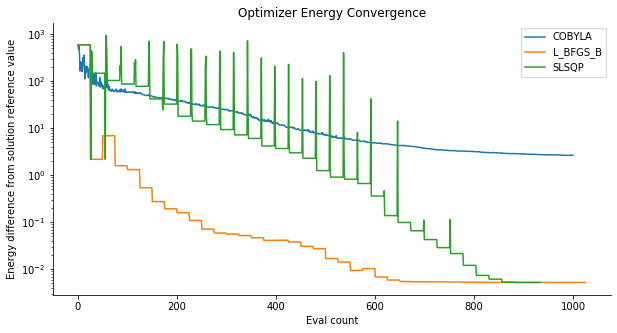

C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\minimum_eigen_solvers\minimum_eigen_solver.py:139: DeprecationWarning: energy deprecated, use eigenvalue property.
  warnings.warn('energy deprecated, use eigenvalue property.', DeprecationWarning)


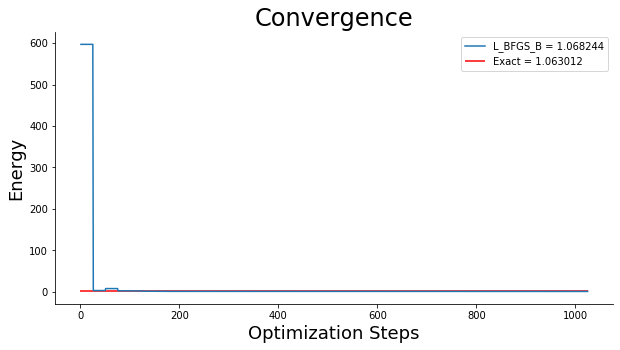

In [8]:
anharmonic_osc = run_VQE(**anh_osc_params)


visualize_results(**anharmonic_osc)

The Variational method got us an upper bound that was roughly 2% away from the actual ground state energy. While this isn't exactly the ground state, for most applications 2% is well close enough to be able to use the value constructively .

# Anharmonic Oscillator VQE

In [7]:
results        = VQE_result(**anh_osc_params)
class_results  = classical_result(**anh_osc_params)

55 Pauli factors 
0 s to process
Optimizer: COBYLA          

C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: The qiskit.aqua.components.variational_forms.RY object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.RealAmplitudes (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.


Optimizer: SLSQP             

C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)


In [8]:
def unitize(a,b):
    #real=a*a
    #imag=b*-b*(-1)
    trial=complex(a,b)
    conj_trial=np.conj(trial)
    answ=trial*conj_trial
    
    return answ

def unitize_all(a_all,b_all):
    unit_arr=[]
    for i in range(0,len(a_all)):
        unit_arr.append(unitize(a_all[i],b_all[i]))
    
    return unit_arr

# Adapted code

In [7]:

h_osc_results        = VQE_result(**h_osc_params)
h_osc_class_results  = classical_result(**h_osc_params)

anh_osc_results        = VQE_result(**anh_osc_params)
anh_osc_class_results  = classical_result(**anh_osc_params)



#COBYLA, L_BFGS_B, SLSQP
#h_osc_results['COBYLA']['eigenstate']

39 Pauli factors 
0 s to process
Optimizer: COBYLA          

C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: The qiskit.aqua.components.variational_forms.RY object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.RealAmplitudes (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.


Optimizer: SLSQP             

C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)


55 Pauli factors 
0 s to process
Optimizer: COBYLA          

C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)
C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\eigen_solver_result.py:64: DeprecationWarning: energy deprecated, use eigenvalues property.
  warnings.warn('energy deprecated, use eigenvalues property.', DeprecationWarning)


Optimizer: SLSQP             

C:\Users\matth\anaconda3\lib\site-packages\qiskit\aqua\algorithms\eigen_solvers\numpy_eigen_solver.py:242: DeprecationWarning: Deprecated class ExactEigensolver, use NumPyEigensolver.
  DeprecationWarning)


[(1+0j), (3.9770790244716543e-28+0j), (0.12319533883066323+0j), (2.0172030234222777e-28+0j), (0.018547210151084823+0j), (7.919345586471196e-29+0j), (0.0020747651472072994+0j), (2.69843069343348e-29+0j), (6.591365816991125e-05+0j), (7.185500101548047e-30+0j), (2.3323869757005533e-05+0j), (4.888264932866247e-31+0j), (4.467284362016568e-05+0j), (1.140489734821995e-31+0j), (1.585485487401111e-05+0j), (8.93317108145492e-31+0j)] 


[1.14048973e-31+0.j 4.88826493e-31+0.j 8.93317108e-31+0.j
 7.18550010e-30+0.j 2.69843069e-29+0.j 7.91934559e-29+0.j
 2.01720302e-28+0.j 3.97707902e-28+0.j 1.58548549e-05+0.j
 2.33238698e-05+0.j 4.46728436e-05+0.j 6.59136582e-05+0.j
 2.07476515e-03+0.j 1.85472102e-02+0.j 1.23195339e-01+0.j
 1.00000000e+00+0.j] 


[1.00000000e+00+0.j 1.23195339e-01+0.j 1.85472102e-02+0.j
 2.07476515e-03+0.j 6.59136582e-05+0.j 4.46728436e-05+0.j
 2.33238698e-05+0.j 1.58548549e-05+0.j 3.97707902e-28+0.j
 2.01720302e-28+0.j 7.91934559e-29+0.j 2.69843069e-29+0.j
 7.18550010e-30+0.j 8.93

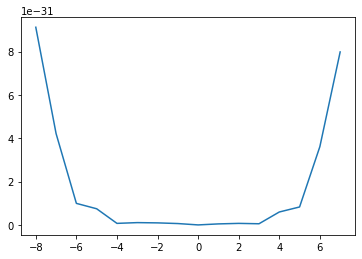

In [32]:
#print(anh_osc_class_results['eigenstates'][0])
an_harm_class=[-8.95091289e-01-2.70115926e-01j,
              1.86448476e-14-1.62573636e-16j,
              3.14169824e-01+9.48085118e-02j,
             -1.32734484e-14+3.86752453e-16j,
             -1.21900820e-01-3.67865862e-02j,
              8.31548214e-15-2.82484908e-16j,
              4.07710412e-02+1.23036697e-02j,
             -4.84528341e-15+3.34048430e-16j,
             -7.26699796e-03-2.19299630e-03j,
              2.49345557e-15-2.52767935e-16j,
             -4.32282480e-03-1.30451926e-03j,
             -6.21637889e-16+2.02174472e-16j,
              5.98258847e-03+1.80539398e-03j,
             -1.64798094e-16-2.69328082e-16j,
             -3.56408839e-03-1.07555179e-03j,
              8.56295296e-16+2.18294378e-16j]   

conj       =np.conj(an_harm_class)
non_conj   =an_harm_class

posi=range(-8,8)


psi_x=[]
for i in range(0,16):
    psi_x.append(non_conj[i]*conj[i])
    
unitary=psi_x

ma=max(unitary)
for i in range(0,len(unitary)):
    unitary[i]=unitary[i]/ma
    

sor=np.sort(unitary)
insor=sor[::-1]

lets_see=[]
for i in range(0,len(sor)):
    lets_see.append(sor[i]*posi[i]*insor[i])

for j in range(0,len(lets_see)):
    sub=abs(lets_see[j])
    lets_see[j]=sub
    
    
print(unitary, '\n\n')
print(sor, "\n\n")
print(insor, "\n\n")
    
print(lets_see)
plt.plot(posi, lets_see)
plt.show()

In [21]:
anh_osc_results['L_BFGS_B']['eigenstate']
#anh_osc_results['SLSQP']['eigenstate']


array([-9.33829862e-01+1.81924840e-15j,  0.00000000e+00+0.00000000e+00j,
        3.28833894e-01-9.51433578e-16j,  0.00000000e+00+0.00000000e+00j,
       -1.30852736e-01-3.07008457e-17j,  0.00000000e+00+0.00000000e+00j,
        4.89898259e-02+1.11431436e-18j,  0.00000000e+00+0.00000000e+00j,
       -1.64646774e-02+9.05472059e-17j,  0.00000000e+00+0.00000000e+00j,
        5.83598887e-03-3.71805947e-17j,  0.00000000e+00+0.00000000e+00j,
       -1.54300275e-03-2.68810276e-18j,  0.00000000e+00+0.00000000e+00j,
        3.05035541e-04+1.75443427e-19j,  0.00000000e+00+0.00000000e+00j])

[(1+0j), (3.4699298835921047e-09+0j), (0.05557707799750389+0j), (2.3307042713232595e-09+0j), (0.004629890643622151+0j), (1.1603661607335697e-09+0j), (0.0004159212585219159+0j), (2.4749417704938395e-08+0j), (3.969412265774241e-05+0j), (1.356089894580178e-10+0j), (2.304542821912259e-06+0j), (1.4187271611260988e-09+0j), (2.274574097568307e-07+0j), (1.6812260157389824e-08+0j), (1.1482076718829241e-07+0j), (3.0271094480145154e-07+0j)] 


[1.35608989e-10+0.j 1.16036616e-09+0.j 1.41872716e-09+0.j
 2.33070427e-09+0.j 3.46992988e-09+0.j 1.68122602e-08+0.j
 2.47494177e-08+0.j 1.14820767e-07+0.j 2.27457410e-07+0.j
 3.02710945e-07+0.j 2.30454282e-06+0.j 3.96941227e-05+0.j
 4.15921259e-04+0.j 4.62989064e-03+0.j 5.55770780e-02+0.j
 1.00000000e+00+0.j] 


[1.00000000e+00+0.j 5.55770780e-02+0.j 4.62989064e-03+0.j
 4.15921259e-04+0.j 3.96941227e-05+0.j 2.30454282e-06+0.j
 3.02710945e-07+0.j 2.27457410e-07+0.j 1.14820767e-07+0.j
 2.47494177e-08+0.j 1.68122602e-08+0.j 3.46992988e-09+0.j
 2.33070427e-09+0

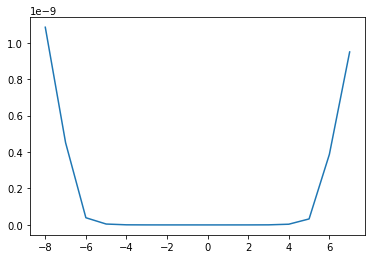

In [33]:
conj       =np.conj(h_osc_results['SLSQP']['eigenstate'])
non_conj   =h_osc_results['SLSQP']['eigenstate']

posi=range(-8,8)


psi_x=[]
for i in range(0,16):
    psi_x.append(non_conj[i]*conj[i])
    
unitary=psi_x #np.real(psi_x)

ma=max(unitary)
for i in range(0,len(unitary)):
    unitary[i]=unitary[i]/ma
    

sor=np.sort(unitary)
insor=sor[::-1]

lets_see=[]
for i in range(0,len(sor)):
    lets_see.append(sor[i]*posi[i]*insor[i])

for j in range(0,len(lets_see)):
    sub=abs(lets_see[j])
    lets_see[j]=sub
    
    
print(unitary, '\n\n')
print(sor, "\n\n")
print(insor, "\n\n")
    
print(lets_see)
plt.plot(posi, lets_see)
plt.show()

16
16
-8    3.916041663934811e-14
-7    4.596769030317528e-15
-6    5.485794966207043e-15
-5    4.834204890062278e-15
-4    1.0535004601402282e-14
-3    4.304462679152319e-15
-2    4.618087212604685e-16
-1    9.593529125191275e-18
0    0.0
1    2.3090436063023426e-16
2    2.8696417861015463e-15
3    7.901253451051712e-15
4    3.867363912049822e-15
5    4.571495805172536e-15
6    3.9400877402721666e-15
7    3.42653645594296e-14
[3.916041663934811e-14, 4.596769030317528e-15, 5.485794966207043e-15, 4.834204890062278e-15, 1.0535004601402282e-14, 4.304462679152319e-15, 4.618087212604685e-16, 9.593529125191275e-18, 0.0, 2.3090436063023426e-16, 2.8696417861015463e-15, 7.901253451051712e-15, 3.867363912049822e-15, 4.571495805172536e-15, 3.9400877402721666e-15, 3.42653645594296e-14]


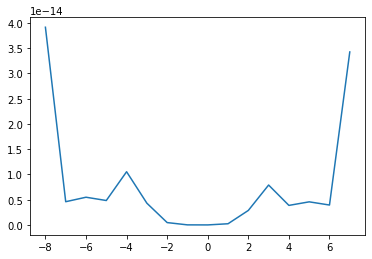

In [31]:
conj       =np.conj(anh_osc_results['SLSQP']['eigenstate'])
non_conj   =anh_osc_results['SLSQP']['eigenstate']

posi=range(-8,8)


psi_x=[]
for i in range(0,16):
    psi_x.append(non_conj[i]*conj[i])
    
unitary=np.real(psi_x)

ma=max(unitary)
for i in range(0,len(unitary)):
    unitary[i]=unitary[i]/ma

sub_unitary=[]
for i in range(0,len(unitary)):
    if unitary[i]!=0:
        sub_unitary.append(unitary[i])
 
unitary=[]
unitary=sub_unitary    

sor=np.sort(unitary)
insor=sor[::-1]

lets_see=[]

for i in range(0,len(sor)):
    lets_see.append(sor[i]*posi[i]*insor[i])


  
for j in range(0,len(lets_see)):
    sub=abs(lets_see[j])
    lets_see[j]=sub
    
    print(posi[j],"  ", lets_see[j])
    
    
    
    

#print(unitary, '\n\n')
#print(sor, "\n\n")
#print(insor, "\n\n")
    
print(lets_see)
plt.plot(posi, lets_see)
plt.show()

In [40]:
anh_osc_class_results

conj       =np.conj(anh_osc_class_results['eigenstates'])
non_conj   =anh_osc_class_results['eigenstates']

posi=range(-8,8)


psi_x=[]
for i in range(0,16):
    psi_x.append(non_conj[i]*conj[i])
    
unitary=np.real(psi_x)

ma=max(unitary)
for i in range(0,len(unitary)):
    unitary[i]=unitary[i]/ma

sub_unitary=[]
for i in range(0,len(unitary)):
    if unitary[i]!=0:
        sub_unitary.append(unitary[i])
 
unitary=[]
unitary=sub_unitary    

sor=np.sort(unitary)
insor=sor[::-1]

lets_see=[]

for i in range(0,len(sor)):
    lets_see.append(sor[i]*posi[i]*insor[i])


  
for j in range(0,len(lets_see)):
    sub=abs(lets_see[j])
    lets_see[j]=sub
    
    print(posi[j],"  ", lets_see[j])
    
    
    
    

#print(unitary, '\n\n')
#print(sor, "\n\n")
#print(insor, "\n\n")
    
print(lets_see)
plt.plot(posi, lets_see)
plt.show()

TypeError: loop of ufunc does not support argument 0 of type VectorStateFn which has no callable conjugate method

In [35]:
N=1000
def Vpot(x):
    return x**4



V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0

NameError: name 'x' is not defined

In [20]:

#COBYLA, L_BFGS_B, SLSQP
#h_osc_results['COBYLA']['eigenstate']

#h_osc_results['L_BFGS_B']['eigenstate']

#for i in h_osc_results['SLSQP']['eigenstate']:
#    print(i)


unit=unitize_all(h_osc_results['SLSQP']['eigenstate'].real,h_osc_results['SLSQP']['eigenstate'].imag)



    
unit_M = np.zeros((len(unit))**2).reshape(len(unit),len(unit))
for i in range(0,len(unit)):
    for j in range(0,len(unit)):
        if i==j:
            unit_M[i,j]= unit[i]
        else:
            unit_M[i,j]=0

for i in unit_M:
    print(i)

print(np.shape(unit_M))
for i in range(0,len(unit)):
    for j in range(0,len(unit)):
        if i==j:
            print(unit_M[i,j])
    

[0.94280423 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0.00000000e+00 3.27146458e-09 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[0.        0.        0.0523983 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.       ]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.19739785e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[0.         0.         0.         0.         0.00436508 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0.00000000e+00 0.00000000e+00 0

C:\Users\matth\anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


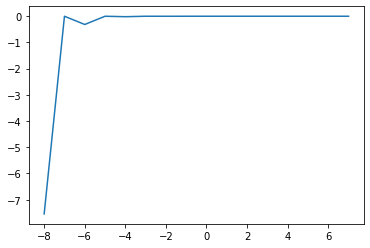

In [26]:
ft=[]
posi=range(-8,8,1)
for i in range(0,len(unit)):
    for j in range(0,len(unit)):
        if i==j:
            ft.append(unit_M[i,j]*posi[i])

            
            
plt.plot(posi,ft)
plt.show()

In [36]:
h_osc_class_results_state_vector=[9.12098146e-01-3.32995760e-01j,
             -3.60813616e-16+6.71504801e-16j,
             -2.14983477e-01+7.84878105e-02j,
              3.93229031e-16-8.16517169e-17j,
              6.20601699e-02-2.26574010e-02j,
              1.03454645e-16-8.58899089e-17j,
             -1.88838365e-02+6.89425531e-03j,
              7.08075899e-17-2.29357480e-16j,
              5.88693519e-03-2.14924728e-03j,
             -5.20905887e-17-3.17780383e-16j,
             -1.85874004e-03+6.78603017e-04j,
              1.82725439e-16+1.41032675e-16j,
              5.85702573e-04-2.13832770e-04j,
              3.47539715e-16+2.91728841e-16j,
             -1.68118292e-04+6.13779106e-05j,
              6.91057656e-17+4.45114522e-17j]

anh_osc_class_results_state_vector= [-8.59410389e-01-3.68191272e-01j,
              6.35826949e-15+1.14991475e-16j,
              3.01646116e-01+1.29232167e-01j,
             -3.98717162e-15+1.84541992e-15j,
             -1.17041504e-01-5.01432854e-02j,
              2.62265745e-15-1.88308681e-15j,
              3.91457908e-02+1.67709615e-02j,
             -1.55123199e-15+8.71388906e-16j,
             -6.97731462e-03-2.98924284e-03j,
              1.17977969e-15+6.10820490e-16j,
             -4.15050463e-03-1.77817211e-03j,
             -6.18670457e-16-1.50571262e-15j,
              5.74410538e-03+2.46090749e-03j,
              2.82016309e-16+2.16156676e-15j,
             -3.42201363e-03-1.46606972e-03j,
             -1.99592552e-16-2.64629085e-15j]

In [37]:

h_osc_class_results_unit_state_vector    =[]
h_osc_class_results_real_state_vector    =[]

anh_osc_class_results_unit_state_vector  =[]
anh_osc_class_results_real_state_vector  =[]

for i in range(0,len(h_osc_class_results_state_vector)):
    h_osc_class_results_unit_state_vector.append(unitize(h_osc_class_results_state_vector[i].real,h_osc_class_results_state_vector[i].imag))
    h_osc_class_results_real_state_vector.append(h_osc_class_results_state_vector[i].real)
    
    anh_osc_class_results_unit_state_vector.append(unitize(anh_osc_class_results_state_vector[i].real,anh_osc_class_results_state_vector[i].imag))
    anh_osc_class_results_real_state_vector.append(anh_osc_class_results_state_vector[i].real)
    
    
    

In [38]:
#COBYLA, L_BFGS_B, SLSQP

print(h_osc_results['COBYLA']['eigenvalue'])
print(h_osc_results['L_BFGS_B']['eigenvalue'])
print(h_osc_results['SLSQP']['eigenvalue'])

print(anh_osc_results['COBYLA']['eigenvalue'])
print(anh_osc_results['L_BFGS_B']['eigenvalue'])
print(anh_osc_results['SLSQP']['eigenvalue'])





h_osc_graph_c          =unitize_all(h_osc_results['COBYLA']['eigenstate'].real, h_osc_results['COBYLA']['eigenstate'].imag)
h_osc_graph_real_c     =h_osc_results['COBYLA']['eigenstate'].real
anh_osc_graph_c        =unitize_all(anh_osc_results['COBYLA']['eigenstate'].real, anh_osc_results['COBYLA']['eigenstate'].imag)
anh_osc_graph_real_c   =anh_osc_results['COBYLA']['eigenstate'].real




h_osc_graph_l          =unitize_all(h_osc_results['L_BFGS_B']['eigenstate'].real, h_osc_results['L_BFGS_B']['eigenstate'].imag)
h_osc_graph_real_l     =h_osc_results['L_BFGS_B']['eigenstate'].real
anh_osc_graph_l        =unitize_all(anh_osc_results['L_BFGS_B']['eigenstate'].real, anh_osc_results['L_BFGS_B']['eigenstate'].imag)
anh_osc_graph_real_l   =anh_osc_results['L_BFGS_B']['eigenstate'].real




h_osc_graph_s          =unitize_all(h_osc_results['SLSQP']['eigenstate'].real, h_osc_results['SLSQP']['eigenstate'].imag)
h_osc_graph_real_s     =h_osc_results['SLSQP']['eigenstate'].real
anh_osc_graph_s        =unitize_all(anh_osc_results['SLSQP']['eigenstate'].real, anh_osc_results['SLSQP']['eigenstate'].imag)
anh_osc_graph_real_s   =anh_osc_results['SLSQP']['eigenstate'].real


(0.5000030151484+0j)
(0.50000286355401+0j)
(0.50001057724461+0j)
(3.72741995096319+0j)
(1.06824411529764+0j)
(1.06824455286896+0j)


C:\Users\matth\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\matth\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\matth\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\matth\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


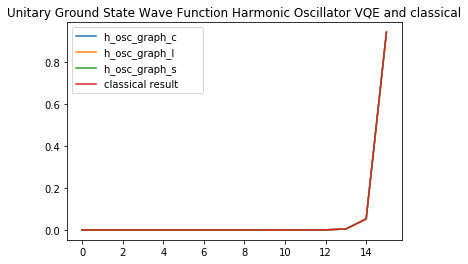

C:\Users\matth\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\matth\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\matth\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\matth\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


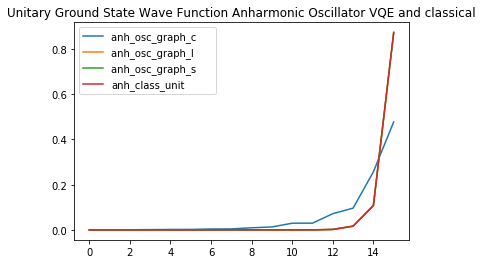

[2.40480876e-14+0.j 1.15429890e-12+0.j 6.01052254e-12+0.j
 6.42374490e-11+0.j 1.05110320e-10+0.j 1.07012916e-10+0.j
 1.74739812e-09+0.j 3.04489918e-09+0.j 2.87134782e-08+0.j
 1.96312377e-07+0.j 2.12312632e-06+0.j 3.83713315e-05+0.j
 4.00421775e-04+0.j 4.35792434e-03+0.j 5.23406904e-02+0.j
 9.42860239e-01+0.j]


'\n\nplt.plot(x,h_osc_graph_real_c  , label=\'h_osc_graph_real_c  \')\nplt.plot(x,h_osc_graph_real_l  , label=\'h_osc_graph_real_l  \')\nplt.plot(x,h_osc_graph_real_s  , label=\'h_osc_graph_real_s  \')\nplt.plot(x,h_osc_class_results_real_state_vector, label=\'classical real result\')\n\nplt.title("Ground State Wave Function Harmonic Oscillator VQE and classical Real Part")\nplt.legend()\nplt.show()\n\n\n\nplt.plot(x,anh_osc_graph_real_c, label=\'anh_osc_graph_real_c\')\nplt.plot(x,anh_osc_graph_real_l, label=\'anh_osc_graph_real_l\')\n\nplt.plot(x,anh_osc_graph_real_s, label=\'anh_osc_graph_real_s\')\nplt.plot(x,anh_osc_class_results_real_state_vector, label=\'anh_class_real\')\n\nplt.title("Ground State Wave Function Anharmonic Oscillator Real Part")\nplt.title("Ground State Wave Function Anharmonic Oscillator Real and Classical results")\nplt.plot\nplt.legend()\nplt.show()\n'

In [43]:
x=range(0,16)
#h_osc_class_results_unit_state_vector
#h_osc_class_results_real_state_vector

#license .itd.bnl.gov

plt.plot(x,np.sort(h_osc_graph_c)       , label='h_osc_graph_c       ')
plt.plot(x,np.sort(h_osc_graph_l)       , label='h_osc_graph_l       ')
plt.plot(x,np.sort(h_osc_graph_s)       , label='h_osc_graph_s       ')
plt.plot(x,np.sort(h_osc_class_results_unit_state_vector), label='classical result')
plt.title("Unitary Ground State Wave Function Harmonic Oscillator VQE and classical")
plt.legend()
plt.show()



plt.plot(x,np.sort(anh_osc_graph_c)     , label='anh_osc_graph_c     ')
plt.plot(x,np.sort(anh_osc_graph_l)     , label='anh_osc_graph_l     ')
plt.plot(x,np.sort(anh_osc_graph_s)     , label='anh_osc_graph_s     ')
plt.plot(x,np.sort(anh_osc_class_results_unit_state_vector), label='anh_class_unit')
plt.title("Unitary Ground State Wave Function Anharmonic Oscillator VQE and classical")


plt.legend()
plt.show()

#Make VQE
print(np.sort(h_osc_graph_c))
"""

plt.plot(x,h_osc_graph_real_c  , label='h_osc_graph_real_c  ')
plt.plot(x,h_osc_graph_real_l  , label='h_osc_graph_real_l  ')
plt.plot(x,h_osc_graph_real_s  , label='h_osc_graph_real_s  ')
plt.plot(x,h_osc_class_results_real_state_vector, label='classical real result')

plt.title("Ground State Wave Function Harmonic Oscillator VQE and classical Real Part")
plt.legend()
plt.show()



plt.plot(x,anh_osc_graph_real_c, label='anh_osc_graph_real_c')
plt.plot(x,anh_osc_graph_real_l, label='anh_osc_graph_real_l')

plt.plot(x,anh_osc_graph_real_s, label='anh_osc_graph_real_s')
plt.plot(x,anh_osc_class_results_real_state_vector, label='anh_class_real')

plt.title("Ground State Wave Function Anharmonic Oscillator Real Part")
plt.title("Ground State Wave Function Anharmonic Oscillator Real and Classical results")
plt.plot
plt.legend()
plt.show()
"""


NameError: name 'b' is not defined

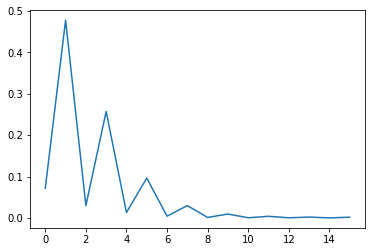

In [40]:

#COBYLA, L_BFGS_B, SLSQP

#print(results['COBYLA']['eigenvalue'])
#print(results['COBYLA']['eigenstate'],  '\n\n')
#print(np.linalg.norm(results['COBYLA']['eigenstate']),  '\n\n')
#print(results['COBYLA']['eigenstate'].real,  '\n\n')
#print(results['COBYLA']['eigenstate'].imag,  '\n\n')


#print(results['COBYLA']['eigenstate'].real[0])
#print(results['COBYLA']['eigenstate'].imag[0],  '\n\n')

def unitize(a,b):
    real=a*a
    imag=b*-b*(-1)
    return real+imag

def unitize_all(a_all,b_all):
    unit_arr=[]
    for i in range(0,len(a_all)):
        unit_arr.append(unitize(a_all[i],b_all[i]))
    
    return unit_arr
        
    
    

#print(unitize(results['COBYLA']['eigenstate'].real[0], results['COBYLA']['eigenstate'].imag[0]))
#print(unitize_all(results['COBYLA']['eigenstate'].real, results['COBYLA']['eigenstate'].imag))

vect=unitize_all(results['COBYLA']['eigenstate'].real, results['COBYLA']['eigenstate'].imag)
len(vect)
x=range(0,len(vect))
plt.plot(x,vect, label="unitary vector")
plt.plot(x,b, label="Classical vector")
plt.plot(x,c, label="Classical real vector")

plt.plot(x,results['COBYLA']['eigenstate'].real, label="Real Part")
plt.legend()
plt.show()

vect=unitize_all(results['L_BFGS_B']['eigenstate'].real, results['L_BFGS_B']['eigenstate'].imag)

len(vect)
x=range(0,len(vect))
plt.plot(x,vect)
plt.plot(x,results['L_BFGS_B']['eigenstate'].real, label="Real Part")
plt.plot(x,b, label="Classical vector")
plt.legend()
plt.show()

vect=unitize_all(results['SLSQP']['eigenstate'].real, results['SLSQP']['eigenstate'].imag)
len(vect)
x=range(0,len(vect))
plt.plot(x,vect)
plt.plot(x,results['SLSQP']['eigenstate'].real, label="Real Part")
plt.plot(x,b, label="Classical vector")
plt.legend()
plt.show()



In [7]:
%qiskit_copyright

# References

- [Quantum Computing: An Applied Approach](https://github.com/JackHidary/quantumcomputingbook)
- [Variational Quantum Eigensolver explained](https://www.mustythoughts.com/post/variational-quantum-eigensolver-explained)
- [VQE Notebook](https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/variational_quantum_eigensolver.ipynb)
- [Simulating Molecules using VQE](https://qiskit.org/textbook/ch-applications/vqe-molecules.html#Simulating-Molecules-using-VQE)
- [Quantum chemistry as a benchmark for near-term quantum computers](https://www.nature.com/articles/s41534-019-0209-0)
- [Generalization of the output of variational quantum eigensolver by parameter interpolation with low-depth ansatz](https://arxiv.org/abs/1810.04482)
- [Digital quantum simulation of molecular vibrations](https://pubs.rsc.org/en/content/articlelanding/2019/sc/c9sc01313j#!divAbstract)
- [Variational Forms (qiskit guide)](https://qiskit-staging.mybluemix.net/documentation/aqua/variational_forms.html)
- [Quantum computing a Gaussian wavefunction](https://medium.com/@sohaib.alam/quantum-computing-a-gaussian-wavefunction-2d0be23d77b2)
- [Variational-Quantum-Eigensolver (VQE) (grove docs)](https://grove-docs.readthedocs.io/en/latest/vqe.html)